# Итоговая работа.

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import derivative
from sklearn.metrics.pairwise import pairwise_distances
from scipy import linalg
from sklearn.decomposition import PCA

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [172]:
### YOUR CODE HERE

In [173]:
from sympy import *

x, y = symbols('x y')
diff((tan(sin(x) + cos(2 * x + 3))) ** 2).evalf(subs={x:1})

55.3859176353379

In [174]:
# или так
def f(x):
    
    return (tan(sin(x) + cos(2 * x + 3))) ** 2

derivative(f, 1.0, dx=1e-6)

55.3859176433136

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

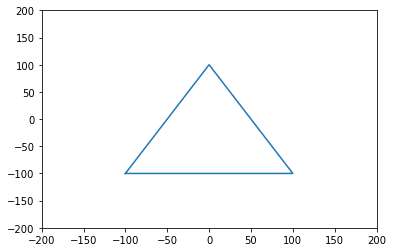

In [175]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


In [176]:
### YOUR CODE HERE
B = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]])

A, B


(array([[-100, -100,    1],
        [   0,  100,    1],
        [ 100, -100,    1],
        [-100, -100,    1]]),
 array([[0.5, 0. , 0. ],
        [0. , 1.2, 0. ],
        [0. , 0. , 1. ]]))

In [177]:
res = B@A.T
tt = res.T

(-200.0, 200.0)

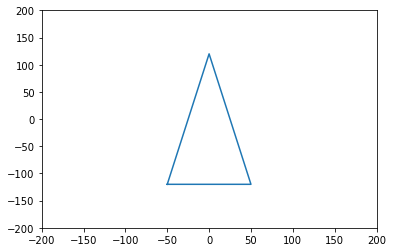

In [178]:
A = np.array(tt)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

In [179]:
tt

array([[ -50., -120.,    1.],
       [   0.,  120.,    1.],
       [  50., -120.,    1.],
       [ -50., -120.,    1.]])

In [180]:
# C1 = np.array([[1, 0, 200], [0, 1, 300], [0, 0, 1]])
C = np.array([200, 300, 1])
C

array([200, 300,   1])

In [181]:
# res2 = C1@tt.T
res2 = tt+C
res2

array([[150., 180.,   2.],
       [200., 420.,   2.],
       [250., 180.,   2.],
       [150., 180.,   2.]])

(0.0, 500.0)

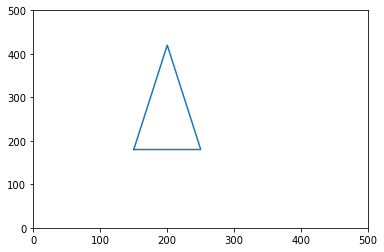

In [182]:
A = np.array(res2)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([0, 500])
plt.xlim([0, 500]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [183]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [184]:
### YOUR CODE HERE

a, U = np.linalg.eig(m)
print('Собств.числа (a):')
print(np.array(a, dtype=float))
print('Собств.векторы (U):')
print(U)

Собств.числа (a):
[ 3. -1.]
Собств.векторы (U):
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [185]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [186]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

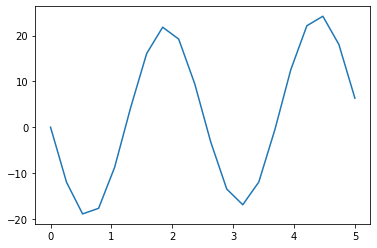

In [187]:
plt.plot(x, fx)
plt.show()

In [188]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [189]:
### YOUR CODE HERE
minimize(error, (0, 0), method='COBYLA')# начальная точка (0, 0).

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [190]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [191]:
### YOUR CODE HERE

cos_us = pairwise_distances(raitings, metric='cosine')
cos_us

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [192]:
index = 0
print(f'10 пар вида (x, y) где y - наиболее похожий пользователь на пользователя x):')
for i in cos_us:
    ko = list(i).index(np.min(i[np.nonzero(i)])) + 1
    index += 1
    print(f'({index}, {ko})')

10 пар вида (x, y) где y - наиболее похожий пользователь на пользователя x):
(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)
